# Task A4.10 - Coding Etiquette & Excel Reporting

### Table of Contents
###### 01. Import Data Set and Create Dataframe
###### 02. Security Implications: Address PII Data
###### 03. Comparing Customer Behavior in Different Geographic Areas
###### 04. Create an Exclusion Flag for Low-Activity Customers
###### 05. Customer Profiling
###### 06. Visualizations to Show Distributions of Profiles
###### 07. Customer-Profile Level Aggregations
###### 08. Compare Customer Profiles with Regions and Departments
###### 09. Visualizations of Results
###### 10. Tidy Up, Export, Save

### 01. Import Data Set and Create Dataframe

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# path shortcut
path = r'/Users/nicolechiu/OneDrive - InterVarsity Christian Fellowship USA/Documents/CF Data Analytics/Achievement 4/05-2023 Instacart Basket Analysis'

In [3]:
# orders_products_all dataframe creation
df_ords_prods_all = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_all.pkl'))

In [4]:
# Data check: Checking shape
df_ords_prods_all.shape

(32404859, 34)

### 02. Security Implications: Address PII Data

In [5]:
# Checking output to address PII data
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,first_name,last_name,gender,state,age,date_joined,number_of_dependants,fam_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423,both


first_name and last_name give identifying information; will drop these columns to address PII data

In [6]:
# Dropping first_name and last_name columns from dataframe
df_ords_prods_all = df_ords_prods_all.drop(columns = ['first_name'])

In [7]:
# Dropping first_name and last_name columns from dataframe
df_ords_prods_all = df_ords_prods_all.drop(columns = ['last_name'])

In [8]:
# Checking output
df_ords_prods_all.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,median_days_since_prior_order,frequency_flag,gender,state,age,date_joined,number_of_dependants,fam_status,income,True
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequency customer,Female,Alabama,31,2/17/2019,3,married,40423,both
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequency customer,Female,Alabama,31,2/17/2019,3,married,40423,both
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequency customer,Female,Alabama,31,2/17/2019,3,married,40423,both
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequency customer,Female,Alabama,31,2/17/2019,3,married,40423,both
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequency customer,Female,Alabama,31,2/17/2019,3,married,40423,both


### 03. Comparing Customer Behavior in Different Geographic Areas

##### Create regional segmentation of the data: Create region column

In [9]:
# Divide states into regions according to 'List of regions of the United States' wiki
northeast = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Connecticut', 'New York', 'Pennsylvania', 'New Jersey']
midwest = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 'Kansas', 'Minnesota', 'Iowa', 'Missouri']
south = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Mississippi', 'Alabama', 'Oklahoma', 'Texas', 'Arkansas', 'Louisiana']
west = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska', 'Washington', 'Oregon', 'California', 'Hawaii']

In [10]:
# Use the loc function to determine the region for each row in the dataframe
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(northeast), 'region'] = 'Northeast'
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(midwest), 'region'] = 'Midwest'
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(south), 'region'] = 'South'
df_ords_prods_all.loc[df_ords_prods_all['state'].isin(west), 'region'] = 'West'

In [11]:
# Check output 
df_ords_prods_all['region'].value_counts(dropna = False)

South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: region, dtype: int64

##### Determine difference in spending habits between different US regions

In [12]:
# Crosstab creation: region and spending_flag columns
crosstab_regional_spending = pd.crosstab(df_ords_prods_all['region'], df_ords_prods_all['spending_flag'], dropna = False)

In [13]:
# Checking output
crosstab_regional_spending

spending_flag,High spender,Low spender
region,,
Midwest,155975,7441350
Northeast,108225,5614511
South,209691,10582194
West,160354,8132559


Here we see that while the South has the most high spenders and low spenders, the Midwest high spenders proportionally bought the most, making up 2.05% of the Midwest market on Instacart. The Northeast high spenders proportionally bought the least at 1.89%. When analyzing the spending habits of high spenders, there is only a 0.2% difference at most between regions.

### 04. Create an Exclusion Flag for Low-Activity Customers

low-activity customer is defined as a customer with < 5 total orders

In [14]:
# Creating exclusion flag
df_ords_prods_all.loc[df_ords_prods_all['max_order'] < 5, 'low_order_flag'] = 'Low order customer'
df_ords_prods_all.loc[df_ords_prods_all['max_order'] >= 5, 'low_order_flag'] = 'High order customer'

In [15]:
df_ords_prods_all['low_order_flag'].value_counts(dropna = False)

High order customer    30964564
Low order customer      1440295
Name: low_order_flag, dtype: int64

In [16]:
# Creating high-activity customer sample
df_ords_prods_all_high = df_ords_prods_all[df_ords_prods_all['low_order_flag'] == 'High order customer']

In [17]:
# Checking output
df_ords_prods_all_high.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,product_name,...,gender,state,age,date_joined,number_of_dependants,fam_status,income,True,region,low_order_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Female,Alabama,31,2/17/2019,3,married,40423,both,South,High order customer


In [18]:
# Exporting the sample of high-activity customers
df_ords_prods_all_high.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_high.pkl'))

### 05. Customer Profiling

Profiling variable based on age, income, certain goods in the 'department_id' column, and number of dependants

##### Age flag

In [19]:
# Create age_flag
age_flag = []
for value in df_ords_prods_all['age'].tolist():
    if value <= 25:
        age_flag.append('Young')
    elif value > 25 and value < 65:
        age_flag.append('Middle-aged')
    elif value >= 65:
        age_flag.append('Senior')
    else:
        print('Weird value:', value)

In [20]:
# Adding age_flag to dataframe as age_profile
df_ords_prods_all['age_profile'] = age_flag

In [21]:
# Frequency distribution for age_profile
df_ords_prods_all['age_profile'].value_counts(dropna = False)

Middle-aged    19784586
Senior          8575084
Young           4045189
Name: age_profile, dtype: int64

##### Income flag

In [22]:
# Understanding income in dataframe
df_ords_prods_all['income'].describe()

count    3.240486e+07
mean     9.943773e+04
std      4.305727e+04
min      2.590300e+04
25%      6.700400e+04
50%      9.661800e+04
75%      1.279120e+05
max      5.939010e+05
Name: income, dtype: float64

Googled what might be considered low-income, which in 2023 is around 14,580 US dollars annually for one person and 30k for a family of four. As we can see from above, the minimum income in the data set is 25,903, which is already above the low-income marker in 2023. 

As such, I will simply use buckets that will fit the data set to indicate low-, mid-, and high-income.

In [23]:
# Creating income_flag
income_flag = []
for x in df_ords_prods_all['income'].tolist():
    if x < 75000:
        income_flag.append('Low-income')
    elif x >= 75000 and x < 150000:
        income_flag.append('Mid-income')
    elif x >= 150000:
        income_flag.append('High-income')
    else:
        print('Weird value:', row)

In [24]:
# Adding income_flag to dataframe as 'income_profile'
df_ords_prods_all['income_profile'] = income_flag

In [25]:
# Frequency distribution for income_profile
df_ords_prods_all['income_profile'].value_counts(dropna = False)

Mid-income     17910512
Low-income     10442766
High-income     4051581
Name: income_profile, dtype: int64

##### Department flag

Currently, veganism is trending, such as the sales of 'impossible' meats, etc. So I will create a profile or flag for customers who tend to buy vegan goods, and label them (customers) as vegan vs. non-vegan.

Someone who is vegan would not buy items from these departments: 12 (meat/seafood) or 16 (dairy/eggs).

In [26]:
# Create crosstab between 'department_id' and 'user_id' to create profile for user
dep_user_cross = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['user_id'], dropna = False)

In [27]:
dep_user_cross

user_id,1,10,100,1000,10000,100000,100001,100002,100003,100004,...,99990,99991,99992,99993,99994,99995,99996,99997,99998,99999
department_id,,,,,,,,,,,,,,,,,,,,,
1,0,1,3,5,56,0,16,7,3,0,...,13,16,4,9,12,7,51,4,2,9
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
3,0,0,2,1,56,8,17,1,2,0,...,1,0,2,4,7,2,4,3,0,7
4,5,72,10,34,340,51,393,0,10,0,...,196,78,4,22,68,10,20,10,14,129
5,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,4,0,0,0,0
6,0,1,0,0,2,1,24,0,0,0,...,0,1,2,0,0,0,1,2,0,1
7,13,0,0,19,36,1,55,2,3,14,...,0,3,10,25,13,3,6,2,0,7
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,38,1,9,0,1,4,...,2,4,8,0,1,2,0,2,0,37


In [28]:
# Create nutrition flag and assigning to users
vegan_dict = dict()
for user in dep_user_cross:
    workinglist = dep_user_cross[user].tolist()
    if workinglist[11] == 0 and workinglist[15] == 0:   # the index starts at 0, so index 0 corresponds to dep_id=1
        vegan_dict[user] = 'Vegan'
    else:
        vegan_dict[user] = 'Non-vegan'

In [29]:
# Assigning user flags to vegan flags
vegan_flag = []
for user in df_ords_prods_all['user_id']:
    vegan_flag.append(vegan_dict[user])

In [30]:
# Adding vegan_flag to dataframe as 'vegan_profile'
df_ords_prods_all['vegan_profile'] = vegan_flag

In [31]:
# Frequency distribution for vegan_profile
df_ords_prods_all['vegan_profile'].value_counts(dropna = False)

Non-vegan    32021432
Vegan          383427
Name: vegan_profile, dtype: int64

##### Family situation flag

In [32]:
# Understanding fam_status in dataset 
df_ords_prods_all['fam_status'].value_counts(dropna = False)

married                             22756753
single                               5325691
divorced/widowed                     2771812
living with parents and siblings     1550603
Name: fam_status, dtype: int64

It would make sense to combine the information from the fam_status variable with the number of dependents to get a fuller 'family situation' flag.

If fam_status = married AND number_of_dependants = 1 : married, no children
If fam_status = married AND number_of_dependants >= 2 : married with children
If fam_status = single OR divorced/widowed OR living with parents and siblings AND number_of_dependants = 0 : single, no children
If fam_status = single OR divorced/widowed OR living with parents and siblings AND number_of_dependants >= 1 : single with children

In [33]:
# Creating the 'family_profile' columns
df_ords_prods_all.loc[(df_ords_prods_all['fam_status'] == 'married') & (df_ords_prods_all['number_of_dependants'] == 1), 'family_profile'] = 'Married no children'
df_ords_prods_all.loc[(df_ords_prods_all['fam_status'] == 'married') & (df_ords_prods_all['number_of_dependants'] >= 2), 'family_profile'] = 'Married with children'
df_ords_prods_all.loc[(df_ords_prods_all['fam_status'] != 'married') & (df_ords_prods_all['number_of_dependants'] == 0), 'family_profile'] = 'Single no children'
df_ords_prods_all.loc[(df_ords_prods_all['fam_status'] != 'married') & (df_ords_prods_all['number_of_dependants'] >= 1), 'family_profile'] = 'Single with children'

In [34]:
# Frequency distribution for family_profile
df_ords_prods_all['family_profile'].value_counts(dropna = False)

Married with children    15205849
Single no children        8097503
Married no children       7550904
Single with children      1550603
Name: family_profile, dtype: int64

### 06. Visualizations to Show Distributions of Profiles

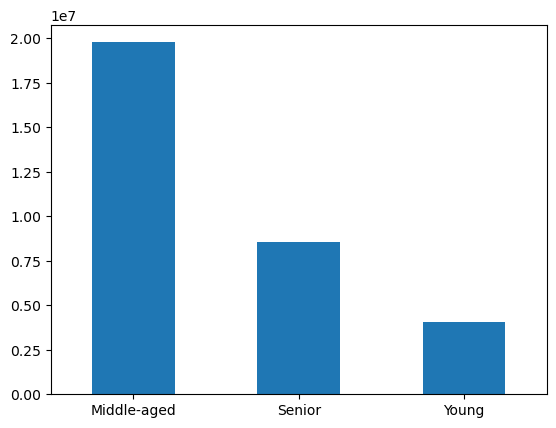

In [35]:
# Visualization of age_profile
bar_age_profile = df_ords_prods_all['age_profile'].value_counts().plot.bar(rot=0)

In [36]:
# Export bar chart
bar_age_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_profile.png'))

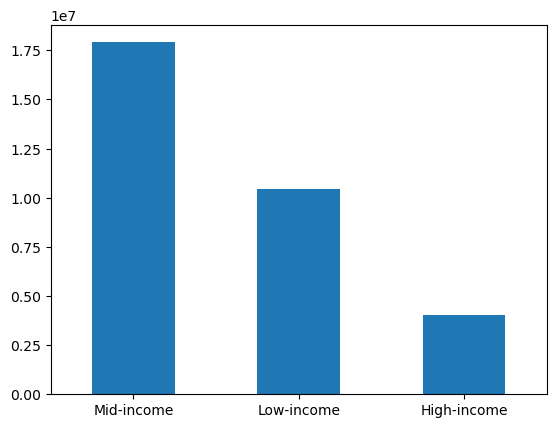

In [37]:
# Visualization of income_profile
bar_income_profile = df_ords_prods_all['income_profile'].value_counts().plot.bar(rot=0)

In [38]:
# Export bar chart
bar_income_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_profile.png'))

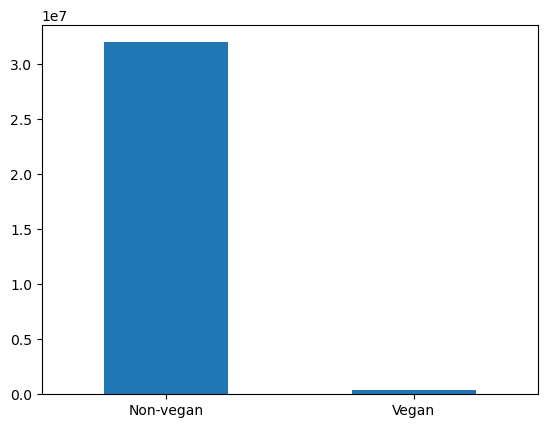

In [39]:
# Visualization of vegan_profile
bar_vegan_profile = df_ords_prods_all['vegan_profile'].value_counts().plot.bar(rot=0)

In [40]:
# Export bar chart
bar_vegan_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_vegan_profile.png'))

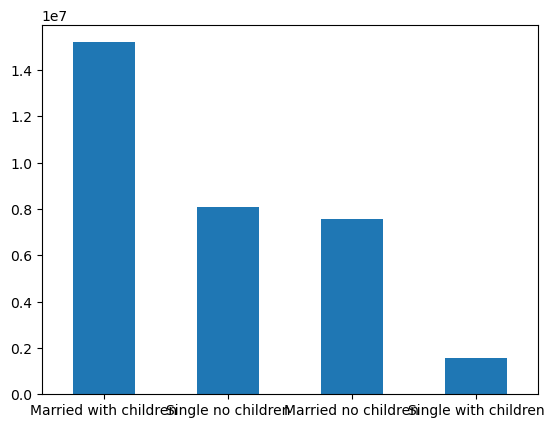

In [41]:
# Visualization of family_profile
bar_family_profile = df_ords_prods_all['family_profile'].value_counts().plot.bar(rot=0)

In [42]:
# Export bar chart
bar_family_profile.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile.png'))

### 07. Customer-Profile Level Aggregations

In [43]:
# Age_profile statistics 
df_ords_prods_all.groupby('age_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                              mean   max  min       mean      max  min
age_profile                                                           
Middle-aged              11.117362  30.0  0.0  12.031993  99999.0  1.0
Senior                   11.078641  30.0  0.0  11.768850  99999.0  1.0
Young                    11.093030  30.0  0.0  12.175118  99999.0  1.0

From the table above, we can see that usage frequency and expenditure seem comparable across age groups, with 'young' customers spending a small bit more than other age groups and 'senior' customers shopping a small bit more frequently than other age groups.

In [44]:
# Income_profile statistics
df_ords_prods_all.groupby('income_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices              
                                 mean   max  min       mean      max  min
income_profile                                                           
High-income                 10.941393  30.0  0.0  32.889850  99999.0  1.0
Low-income                  11.240514  30.0  0.0   7.443285  14900.0  1.0
Mid-income                  11.061703  30.0  0.0   9.895482  99999.0  1.0

From the table above, we see that usage frequency is comparable across income groups, with high-income customers shopping a bit more frequently than other income groups. In terms of expenditure or spending, high-income customers spend meaningfully more than low- and mid-income groups, by around 5x more than low-income groups.

In [45]:
# Vegan_profile statistics
df_ords_prods_all.groupby('vegan_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order               prices              
                                mean   max  min      mean      max  min
vegan_profile                                                          
Non-vegan                  11.063329  30.0  0.0  12.03974  99999.0  1.0
Vegan                      14.749275  30.0  0.0   7.00992     20.0  1.0

From the table above, we see that non-vegans shop slightly more frequently (11 days since their last purchase, as opposed to 15 days for vegans). This makes sense given the shelf life of meats and seafood and dairy tend to be short. Vegans also tend to purchase cheaper products compared to non-vegans.

In [46]:
# Family_profile statistics
df_ords_prods_all.groupby('family_profile').agg({'days_since_prior_order': ['mean', 'max', 'min'], 'prices': ['mean', 'max', 'min']})

days_since_prior_order                prices           \
                                        mean   max  min       mean      max   
family_profile                                                                
Married no children                11.113141  30.0  0.0  11.705834  99999.0   
Married with children              11.117681  30.0  0.0  12.154546  99999.0   
Single no children                 11.080805  30.0  0.0  12.129243  99999.0   
Single with children               11.048170  30.0  0.0  10.828768  99999.0   

                            
                       min  
family_profile              
Married no children    1.0  
Married with children  1.0  
Single no children     1.0  
Single with children   1.0

In terms of usage frequency, there is no meaningful difference across the family situations. In terms of spending, single with children actually tend to spend less than both single no children AND married with children. Those who are married with children spend a small bit more than other groups.

### 08. Compare Customer Profiles with Regions and Departments

##### By Region

In [49]:
# Crosstab creation to compare age_profile and region, looking at column percentages
age_region_cross = pd.crosstab(df_ords_prods_all['age_profile'], df_ords_prods_all['region'], normalize = 'columns')
# normalize = 'columns' outputs the column percentages

In [50]:
age_region_cross

region,Midwest,Northeast,South,West
age_profile,,,,
Middle-aged,0.614288,0.604208,0.609621,0.612686
Senior,0.262045,0.271531,0.262814,0.264573
Young,0.123666,0.124261,0.127565,0.122741


From the above table, we see that there are similar age groups across all regions.

In [51]:
# Crosstab creation to compare income_profile and region, looking at column percentages
income_region_cross = pd.crosstab(df_ords_prods_all['income_profile'], df_ords_prods_all['region'], normalize = 'columns')

In [52]:
income_region_cross

region,Midwest,Northeast,South,West
income_profile,,,,
High-income,0.125827,0.123505,0.124372,0.126208
Low-income,0.319571,0.318405,0.323667,0.325550
Mid-income,0.554602,0.558090,0.551961,0.548242


From the table above, we see similar income groups across all regions.

In [53]:
# Crosstab creation to compare vegan_profile and region, looking at column percentages
vegan_region_cross = pd.crosstab(df_ords_prods_all['vegan_profile'], df_ords_prods_all['region'], normalize = 'columns')

In [54]:
vegan_region_cross

region,Midwest,Northeast,South,West
vegan_profile,,,,
Non-vegan,0.988115,0.988159,0.988389,0.987934
Vegan,0.011885,0.011841,0.011611,0.012066


From the table above, we see similar vegan/non-vegan groups across all regions, with perhaps slightly more vegans in the West region.

In [55]:
# Crosstab creation to compare family_profile and region, looking at column percentages
family_region_cross = pd.crosstab(df_ords_prods_all['family_profile'], df_ords_prods_all['region'], normalize = 'columns')

In [56]:
family_region_cross

region,Midwest,Northeast,South,West
family_profile,,,,
Married no children,0.236932,0.236116,0.229883,0.231373
Married with children,0.464053,0.469197,0.470703,0.472141
Single no children,0.250772,0.247836,0.250342,0.249893
Single with children,0.048243,0.046851,0.049072,0.046593


From the table above, we see similar family situations across all regions, with perhaps slightly fewer married with no children in the South region, slightly more married with children in the South and West regions, and slightly more single with no children in the Midwest and South regions.

##### By Departments

In [57]:
# Crosstab creation to compare age_profile and department_id, looking at column percentages
age_department_cross = pd.crosstab(df_ords_prods_all['age_profile'], df_ords_prods_all['department_id'], normalize = 'index') 

In [58]:
age_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
age_profile,,,,,,,,,,,,,,,,,,,,,
Middle-aged,0.068796,0.001122,0.036214,0.292547,0.004764,0.008312,0.082903,0.002938,0.026682,0.001057,...,0.021732,0.057853,0.021718,0.032962,0.166679,0.022748,0.013210,0.089266,0.032507,0.002125
Senior,0.069232,0.001099,0.036096,0.293147,0.004552,0.008253,0.083362,0.003065,0.026698,0.001078,...,0.022171,0.057956,0.021439,0.032937,0.166321,0.022966,0.012763,0.088689,0.032375,0.002110
Young,0.069212,0.001154,0.036198,0.291112,0.005046,0.008414,0.082342,0.003287,0.027146,0.001093,...,0.021965,0.057796,0.022129,0.033000,0.166830,0.022662,0.013105,0.089228,0.032261,0.002225


There is markedly more being purchased in department 4 (produce) than other departments across all age groups.
Those in the Young age group tend to purchase more alcohol than other age groups - department 5. 
Those in the Middle-aged group tend to purchase less for their pets compared to other age groups - department 8.

In [59]:
# Crosstab creation to compare income_profile and department_id, looking at column percentages
income_department_cross = pd.crosstab(df_ords_prods_all['income_profile'], df_ords_prods_all['department_id'], normalize = 'index')

In [60]:
income_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
income_profile,,,,,,,,,,,,,,,,,,,,,
High-income,0.071178,0.001172,0.038023,0.291115,0.006159,0.008462,0.080252,0.003335,0.027462,0.000931,...,0.023628,0.059801,0.021438,0.034248,0.168907,0.023887,0.013435,0.078240,0.032334,0.002157
Low-income,0.067229,0.001114,0.034505,0.279570,0.004614,0.007760,0.091741,0.002845,0.024468,0.001184,...,0.017992,0.055207,0.023537,0.030146,0.160883,0.023559,0.011447,0.113855,0.032205,0.002150
Mid-income,0.069473,0.001111,0.036741,0.300400,0.004498,0.008595,0.078442,0.003043,0.027908,0.001029,...,0.023747,0.058992,0.020680,0.034309,0.169417,0.022102,0.013949,0.077139,0.032603,0.002119


Again, produce (department 4) seems to have more purchases than any other department, across all income groups.
High-income folks buy more frozen foods (dept 1) and alcohol (dept 5) than other income groups.
Beverage spending (dept 7) is varied across income groups: low > high > mid.
High-income folks do NOT tend to buy in bulk compared to other income groups (dept 10).
Low-income folks tend to buy more snacks than other income groups (dept 19).

In [61]:
# Crosstab creation to compare vegan_profile and department_id, looking at column percentages
vegan_department_cross = pd.crosstab(df_ords_prods_all['vegan_profile'], df_ords_prods_all['department_id'], normalize = 'index')

In [62]:
vegan_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
vegan_profile,,,,,,,,,,,,,,,,,,,,,
Non-vegan,0.069073,0.001104,0.036399,0.292392,0.004387,0.008358,0.081628,0.003010,0.026952,0.001059,...,0.022139,0.058016,0.021700,0.033148,0.168598,0.022303,0.013163,0.088189,0.032604,0.002135
Vegan,0.059795,0.002470,0.017964,0.303800,0.034432,0.004222,0.193680,0.003484,0.009386,0.001750,...,0.000000,0.045936,0.021263,0.017244,0.000000,0.063884,0.006045,0.165925,0.018809,0.002037


There is a difference across almost all departments, except: pets, bulk, pantry, breakfast, and 'missing'.
Vegans spend more on: produce (4), alcohol (5), beverages (7), hosuehold (17), and snacks (19).

In [63]:
# Crosstab creation to compare family_profile and department_id, looking at column percentages
family_department_cross = pd.crosstab(df_ords_prods_all['family_profile'], df_ords_prods_all['department_id'], normalize = 'index')

In [64]:
family_department_cross

department_id,1,2,3,4,5,6,7,8,9,10,...,12,13,14,15,16,17,18,19,20,21
family_profile,,,,,,,,,,,,,,,,,,,,,
Married no children,0.068501,0.001134,0.036290,0.292094,0.004674,0.008405,0.082844,0.002980,0.026714,0.001107,...,0.022041,0.058145,0.021909,0.033025,0.167336,0.022995,0.012703,0.089014,0.032144,0.002111
Married with children,0.069171,0.001094,0.036029,0.292561,0.004629,0.008221,0.083094,0.002960,0.026828,0.001070,...,0.021994,0.057826,0.021590,0.033057,0.166058,0.022954,0.013235,0.089272,0.032420,0.002140
Single no children,0.068806,0.001133,0.036358,0.293355,0.004831,0.008362,0.083290,0.003036,0.026584,0.001022,...,0.021498,0.057642,0.021559,0.032706,0.166639,0.022325,0.013151,0.089015,0.032744,0.002110
Single with children,0.069994,0.001232,0.036207,0.289970,0.005737,0.008432,0.080375,0.003624,0.026894,0.001080,...,0.021915,0.058217,0.022398,0.033013,0.168184,0.022718,0.012992,0.088458,0.032513,0.002303


The numbers seem fairly similar across the board. The only differences I can spot are that alcohol (dept 5) has slightly more spend from single customers, particularly those without children. Single customers with children also purchase slightly more for their pets (dept 8). 

### 09. Visualizations of Results

##### By Region

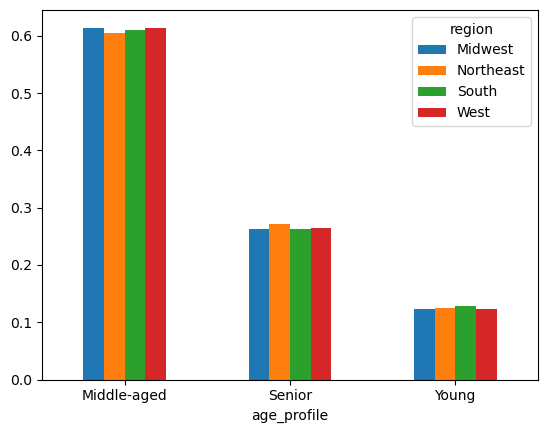

In [65]:
# Visualization of age_profile by region
bar_age_region = age_region_cross.plot.bar(rot=0)

In [66]:
# Export bar chart
bar_age_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_profile_region.png'))

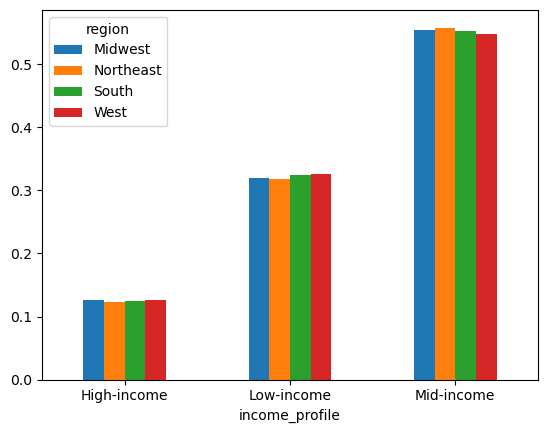

In [67]:
# Visualization of income_profile by region
bar_income_region = income_region_cross.plot.bar(rot=0)

In [68]:
# Export bar chart
bar_income_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_profile_region.png'))

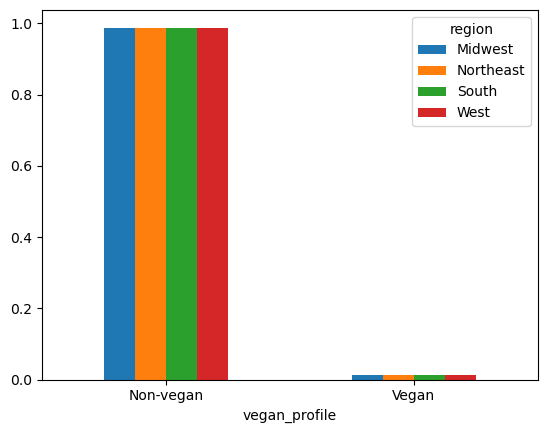

In [69]:
# Visualization of vegan_profile by region
bar_vegan_region = vegan_region_cross.plot.bar(rot=0)

In [70]:
# Export bar chart
bar_vegan_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_vegan_profile_region.png'))

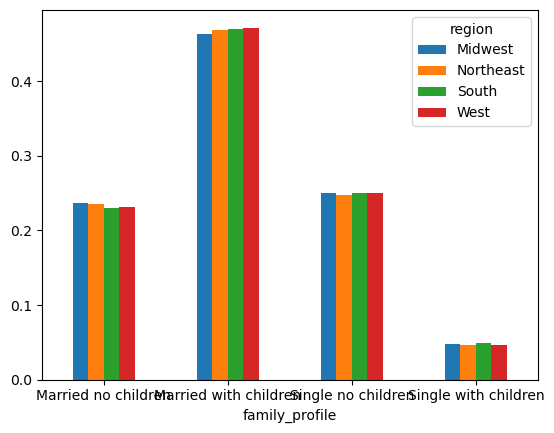

In [71]:
# Visualization of family_profile by region
bar_family_region = family_region_cross.plot.bar(rot=0)

In [72]:
# Export bar chart
bar_family_region.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile_region.png'))

##### By Department

In [73]:
# Need to create crosstab so departments on x-axis
age_department_cross = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['age_profile'])

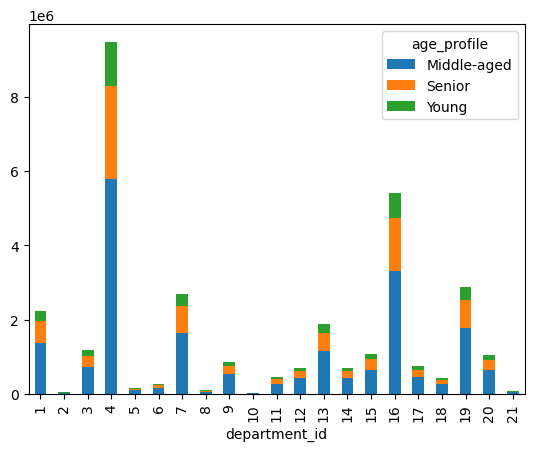

In [74]:
# Visualization of age_profile by department
bar_age_dept = age_department_cross.plot.bar(stacked = True)

In [75]:
# Export bar chart
bar_age_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_age_profile_dept.png'))

In [76]:
# Need to create crosstab so departments on x-axis
income_dept_cross = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['age_profile'])

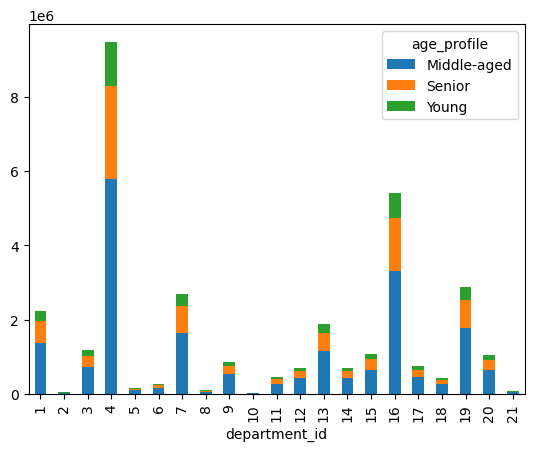

In [77]:
# Visualization of income_profile by department
bar_income_dept = income_dept_cross.plot.bar(stacked = True)

In [78]:
# Need to create crosstab so departments on x-axis - Attempt 2
income_dept_cross = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['income_profile'])

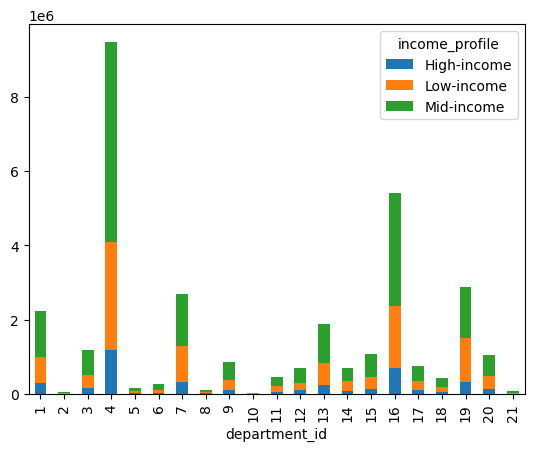

In [79]:
# Visualization of income_profile by department
bar_income_dept = income_dept_cross.plot.bar(stacked = True)

In [80]:
# Export bar chart
bar_income_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_income_profile_dept.png'))

In [81]:
# Need to create crosstab so departments on x-axis
vegan_dept_cross = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['vegan_profile'])

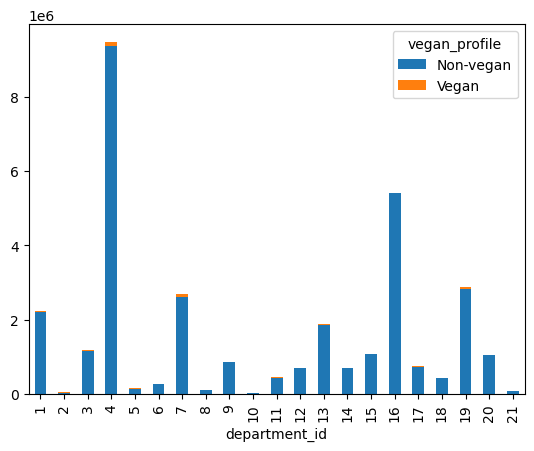

In [82]:
# Visualization of vegan_profile by department
bar_vegan_dept = vegan_dept_cross.plot.bar(stacked = True)

In [83]:
# Export bar chart
bar_vegan_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_vegan_profile_dept.png'))

In [84]:
# Need to create crosstab so departments on x-axis
family_dept_cross = pd.crosstab(df_ords_prods_all['department_id'], df_ords_prods_all['family_profile'])

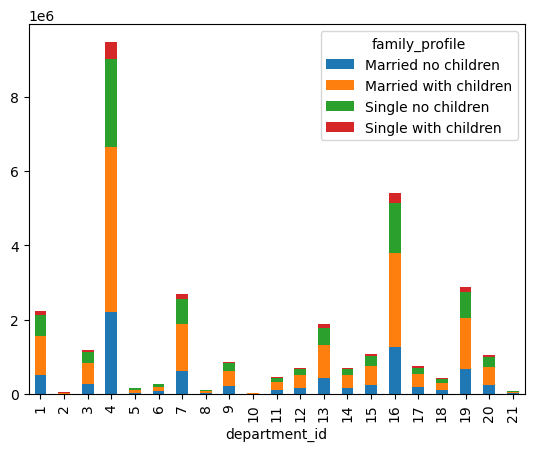

In [85]:
# Visualization of family_profile by department
bar_family_dept = family_dept_cross.plot.bar(stacked = True)

In [86]:
# Export bar chart
bar_family_dept.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'bar_family_profile_dept.png'))

### 10. Tidy Up, Export, Save

In [87]:
# Export final pkl
df_ords_prods_all.to_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'orders_products_final_report.pkl'))